# Loading the Reuters Dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Check what the data looks like

In [7]:
print(len(train_data), len(train_data[0]))
print(len(train_labels))
print(len(test_data), len(test_data[0]))
print(len(test_labels))

8982 87
8982
2246 145
2246


In [17]:
print(train_data[0])
print(train_labels[:10])
print(min(train_labels), max(train_labels))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3  4  3  4  4  4  4  3  3 16]
0 45


## decode back to words

In [11]:
word_index = reuters.get_word_index()
print(list(word_index.items())[:10])

[('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804)]


In [13]:
index2word = {val: key for (key, val) in word_index.items()}
print(list(index2word.items())[:10])

[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [15]:
print(" ".join(index2word[index] for index in train_data[0]))

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


# Prepare the data

one-hot vectorization for both data and labels

In [19]:
import numpy as np

def word2tensor(data, num_words=10000):
    
    tensor = np.zeros((len(data), num_words))
    
    for i in  range(len(data)):
        for index in data[i]:
            tensor[i, index] = 1
            
    return tensor

x_train = word2tensor(train_data)
x_test = word2tensor(test_data)

def cat2tensor(labels):
    
    cat_max = max(labels)
    cat_min = min(labels)
    
    tensor = np.zeros((len(labels), cat_max-cat_min+1))
    
    for i in range(len(labels)):
        
        tensor[i, labels[i]] = 1
        
    return tensor

y_train = cat2tensor(train_labels)
y_test = cat2tensor(test_labels)
        

## double check the converted data

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)
print(sum(y_train))

(8982, 10000)
(8982, 46)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[  55.  432.   74. 3159. 1949.   17.   48.   16.  139.  101.  124.  390.
   49.  172.   26.   20.  444.   39.   66.  549.  269.  100.   15.   41.
   62.   92.   24.   15.   48.   19.   45.   39.   32.   11.   50.   10.
   49.   19.   19.   24.   36.   30.   13.   21.   12.   18.]


# Build and Validate model

In [30]:
from keras import models
from keras import layers

# build the model
model_val = models.Sequential()
model_val.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_val.add(layers.Dense(64, activation='relu'))
model_val.add(layers.Dense(46, activation='softmax'))


# compile the model
model_val.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## train the model

In [32]:
history = model_val.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 2.5534 - accuracy: 0.5397 - val_loss: 1.6882 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3899 - accuracy: 0.7077 - val_loss: 1.2830 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0393 - accuracy: 0.7766 - val_loss: 1.1443 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8206 - accuracy: 0.8289 - val_loss: 1.0260 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6541 - accuracy: 0.8643 - val_loss: 0.9493 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5232 - accuracy: 0.8909 - val_loss: 0.9194 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4171 - accuracy: 0.9148 - val_loss: 0.9020 - val_accuracy: 0.8120
Epoch 8/20
16

## Plot the training and validation loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


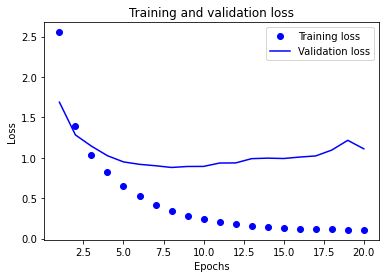

In [35]:
print(history.history.keys())

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plot the training and validation accuracy

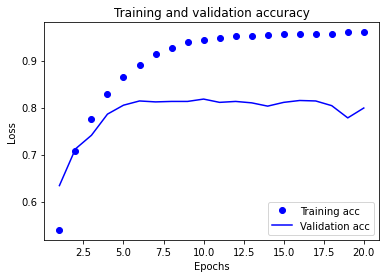

In [36]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




# Build the actual model

In [37]:
# build the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


# compile the model
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train,
         epochs=8,
         batch_size=512)

Epoch 1/8
18/18 [==============================] - 0s 13ms/step - loss: 2.5266 - accuracy: 0.5507
Epoch 2/8
18/18 [==============================] - 0s 13ms/step - loss: 1.3351 - accuracy: 0.7249
Epoch 3/8
18/18 [==============================] - 0s 13ms/step - loss: 0.9899 - accuracy: 0.7900
Epoch 4/8
18/18 [==============================] - 0s 13ms/step - loss: 0.7781 - accuracy: 0.8338
Epoch 5/8
18/18 [==============================] - 0s 13ms/step - loss: 0.6214 - accuracy: 0.8676
Epoch 6/8
18/18 [==============================] - 0s 13ms/step - loss: 0.5011 - accuracy: 0.8986
Epoch 7/8
18/18 [==============================] - 0s 13ms/step - loss: 0.3994 - accuracy: 0.9187
Epoch 8/8
18/18 [==============================] - 0s 10ms/step - loss: 0.3327 - accuracy: 0.9299


## Evaluate the result

In [40]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 1ms/step - loss: 0.9514 - accuracy: 0.7930
[0.9514004588127136, 0.792965292930603]


# Generate predictions on new data

In [44]:
predictions = model.predict(x_test)
print(predictions[0])
print(sum(predictions[0]))
print(np.argmax(predictions[0]))

[3.04201021e-05 7.21859979e-05 9.23449534e-06 9.22605038e-01
 7.10088387e-02 3.44125219e-05 2.84535527e-05 1.65859092e-05
 5.87669201e-04 1.32651712e-05 8.96557322e-05 8.39325425e-04
 4.01000259e-04 5.75884806e-05 1.52621487e-05 1.04196206e-05
 4.71032021e-04 8.48004765e-06 4.08035703e-05 1.23882946e-03
 1.08594098e-03 2.21720271e-04 1.38167543e-05 4.81637144e-05
 2.55056002e-05 1.55654925e-04 4.38852931e-06 3.79599114e-05
 4.62286989e-05 4.59224721e-05 1.26499130e-04 2.13256899e-05
 1.35787614e-05 5.05475145e-06 1.30825312e-04 1.11606087e-05
 1.56329872e-04 9.48908200e-06 5.16465516e-05 9.76880474e-05
 1.61863136e-05 5.08970770e-05 1.17534455e-05 3.15679536e-05
 1.02366914e-06 1.04632500e-06]
0.9999998745630592
3
